In [984]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table 
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [1481]:
allergy_df=pd.read_csv('data300k.csv')

In [1419]:
allergy_df.describe()


,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


In [1018]:
allergy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333200 entries, 0 to 333199
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SUBJECT_ID               333200 non-null  int64  
 1   BIRTH_YEAR               333200 non-null  int64  
 2   GENDER_FACTOR            333200 non-null  object 
 3   RACE_FACTOR              333200 non-null  object 
 4   ETHNICITY_FACTOR         333200 non-null  object 
 5   PAYER_FACTOR             333200 non-null  object 
 6   ATOPIC_MARCH_COHORT      333200 non-null  bool   
 7   AGE_START_YEARS          333200 non-null  float64
 8   AGE_END_YEARS            333200 non-null  float64
 9   SHELLFISH_ALG_START      5246 non-null    float64
 10  SHELLFISH_ALG_END        1051 non-null    float64
 11  FISH_ALG_START           1796 non-null    float64
 12  FISH_ALG_END             527 non-null     float64
 13  MILK_ALG_START           7289 non-null    float64
 14  MILK

In [1482]:
#Clean data and copy it in the allallergy_df_clean dataframe
allergy_df_clean=allergy_df.copy()

#select all the numeric columns 
numeric_col=allergy_df.describe().columns

deleted_rows_count=0
data_err_number=0
#check if any data in the numeric cols is negetive
#then delete the rows with negetive values
for col in numeric_col:
    data_err_number= len(allergy_df_clean[allergy_df_clean[col] < 0])
    if (data_err_number > 0):
        print(f'{data_err_number} negetive values were removed from {col} column')
        allergy_df_clean=allergy_df_clean.drop(allergy_df_clean[allergy_df_clean[col] <= 0].index)
        deleted_rows_count+=data_err_number

allergy_df_clean.drop(columns=['TREENUT_ALG_START','TREENUT_ALG_END'],inplace=True)

#put all the unknown and other races in 'R3 - Other' group
allergy_df_clean.replace('R4 - Unknown', 'R3 - Other',inplace=True)
print(f'\n------ {deleted_rows_count} rows deleted. --------')
allergy_df_clean.head()

25 negetive values were removed from AGE_START_YEARS column
6 negetive values were removed from MILK_ALG_START column
1 negetive values were removed from SOY_ALG_START column
3 negetive values were removed from EGG_ALG_START column
10 negetive values were removed from ATOPIC_DERM_START column
7 negetive values were removed from ALLERGIC_RHINITIS_START column

------ 52 rows deleted. --------


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R3 - Other,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1483]:
race_df=(allergy_df_clean.groupby('RACE_FACTOR').count()['SUBJECT_ID']/total_rows*100).to_frame()
race_df.columns=['Percentage']
race_df['Percentage'] = race_df['Percentage'].map("{:,.2f}%".format)
race_df

,Percentage
RACE_FACTOR,
R0 - White,55.01%
R1 - Black,29.35%
R2 - Asian or Pacific Islander,2.75%
R3 - Other,12.89%


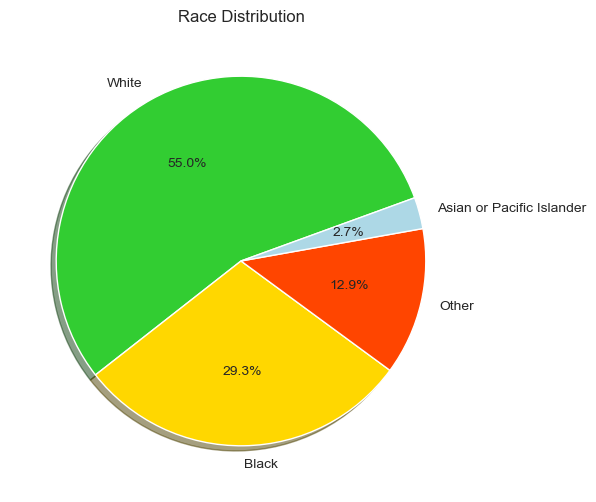

In [1484]:
allergy_df_clean['RACE_FACTOR'].unique()
labels=[x[5:] for x in allergy_df_clean['RACE_FACTOR'].value_counts().index]
sizes=[x for x in allergy_df_clean['RACE_FACTOR'].value_counts()]
colors = ["limegreen","gold","orangered","lightblue","red"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=20 ,
        textprops={'fontsize': 10})
plt.title('Race Distribution')
plt.savefig('output_data/raceDist.png')

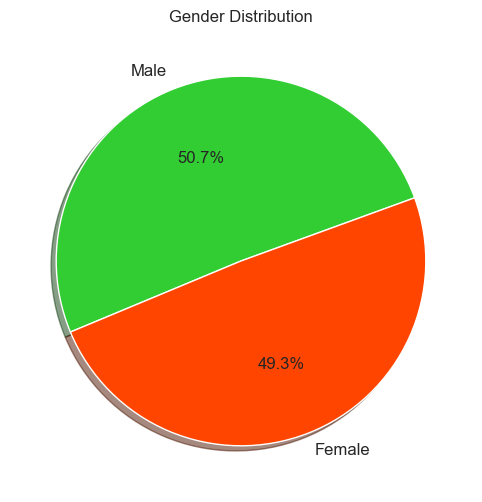

In [1480]:
allergy_df_clean['GENDER_FACTOR'].unique()
labels=[x[5:] for x in allergy_df_clean['GENDER_FACTOR'].value_counts().index]
sizes=[x for x in allergy_df_clean['GENDER_FACTOR'].value_counts()]
colors = ["limegreen","orangered"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=20 ,
        textprops={'fontsize': 12})
plt.title('Gender Distribution')
plt.savefig('output_data/genderDist.png')

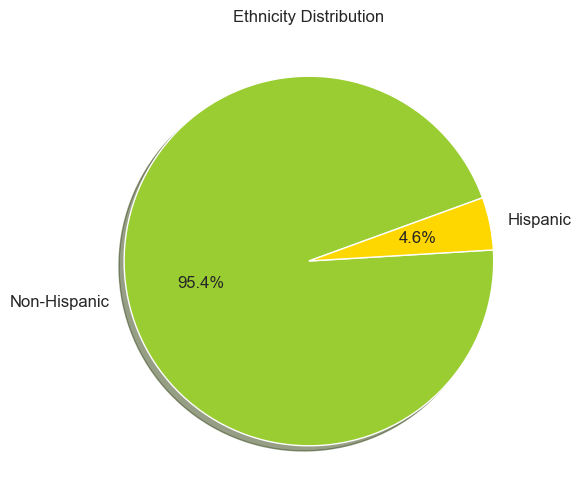

In [1476]:
allergy_df_clean['ETHNICITY_FACTOR'].unique()
labels=[x[5:] for x in allergy_df_clean['ETHNICITY_FACTOR'].value_counts().index]
sizes=[x for x in allergy_df_clean['ETHNICITY_FACTOR'].value_counts()]
colors = ["yellowgreen","gold"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=20 ,
        textprops={'fontsize': 12})
plt.title('Ethnicity Distribution')
plt.savefig('output_data/EthnicityDist.png')

<Figure size 500x800 with 0 Axes>

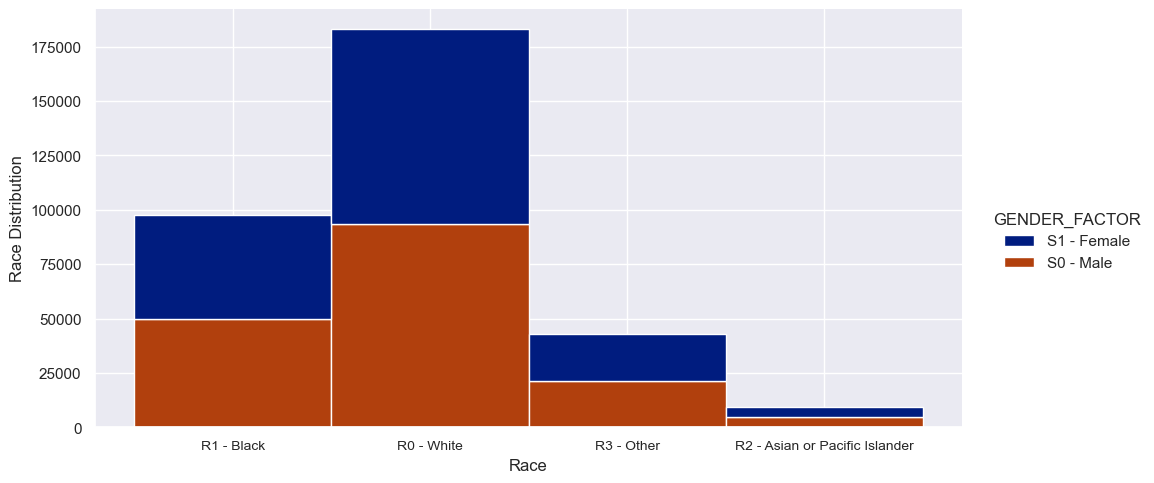

In [1194]:
plt.figure(figsize=(5,8))
sns_plot=sns.displot( data=allergy_df_clean,x='RACE_FACTOR',
            hue='GENDER_FACTOR',alpha=1, multiple="stack",height=5, aspect=2)

sns.set_palette('dark')
sns_plot.axes[0,0].set_xlabel('Race')
sns_plot.axes[0,0].set_ylabel('Race Distribution')
sns_plot.savefig('output_data/RaceDist.png')



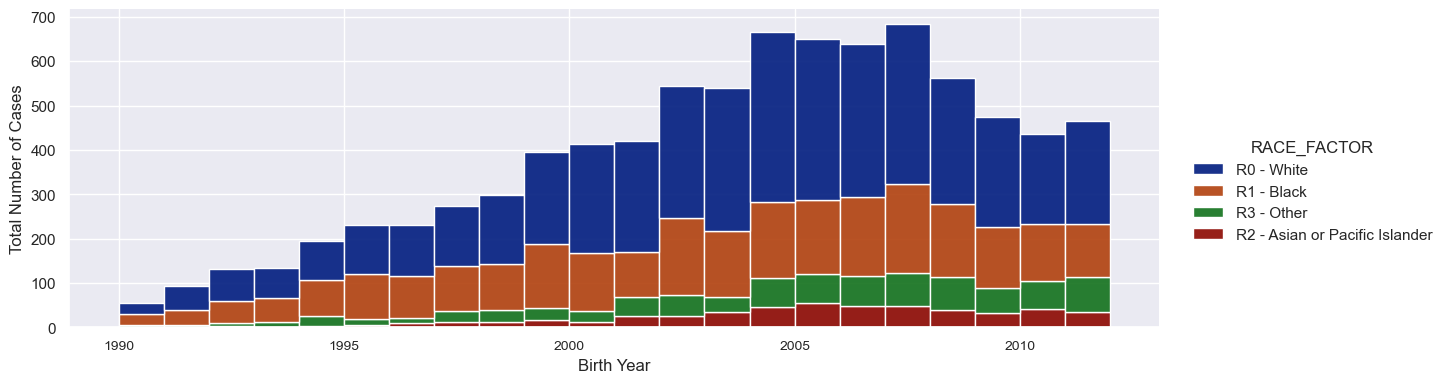

In [1490]:
years=range(1990,2013)
sns_plot=sns.displot( data=peanut_df_clean,x='BIRTH_YEAR',bins=years,
            hue='RACE_FACTOR',alpha=0.9, multiple="stack",
           height=4,aspect=3)
sns.set_palette('dark')
plt.xlabel('Birth Year')
plt.ylabel('Total Number of Cases')

sns_plot.savefig('output_data/yearSummary.png')


In [1260]:
allergy_df_clean['BIRTH_YEAR'].describe().to_frame()

,BIRTH_YEAR
count,332801.000000
mean,2001.253329
std,6.601794
min,1983.000000
25%,1996.000000
50%,2002.000000
75%,2007.000000
max,2012.000000


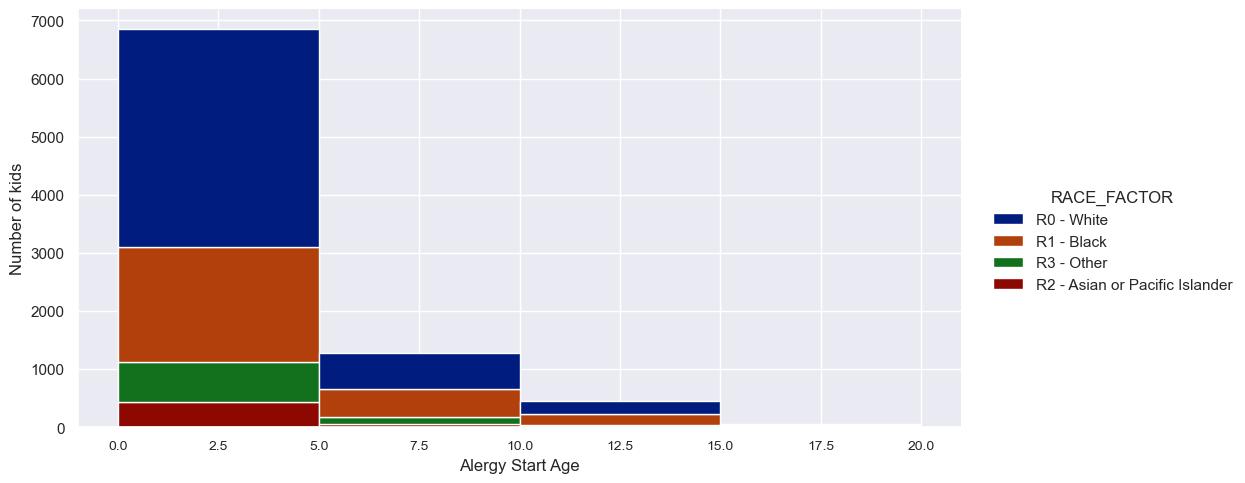

In [1261]:
years=[0,5,10,15,20]
sns_plot=sns.displot( data=peanut_df_clean,x='AGE_START_YEARS',bins=years,
            hue='RACE_FACTOR',alpha=1, multiple="stack",
                    height=5,aspect=2)

sns_plot.axes[0,0].set_xlabel('Alergy Start Age')
sns_plot.axes[0,0].set_ylabel('Number of kids')

sns_plot.savefig('output_data/alergyStartAgeDist.png')

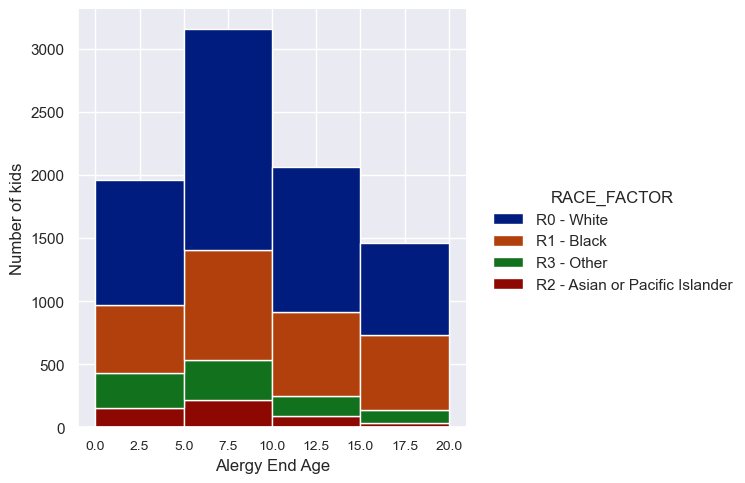

In [1269]:
years=[0,5,10,15,20]
sns_plot=sns.displot( data=peanut_df_clean,x='AGE_END_YEARS',bins=years,
            hue='RACE_FACTOR',alpha=1, multiple="stack",palette='dark')

sns_plot.axes[0,0].set_xlabel('Alergy End Age')
sns_plot.axes[0,0].set_ylabel('Number of kids')

sns_plot.savefig('output_data/alergyEndAgeDist.png')

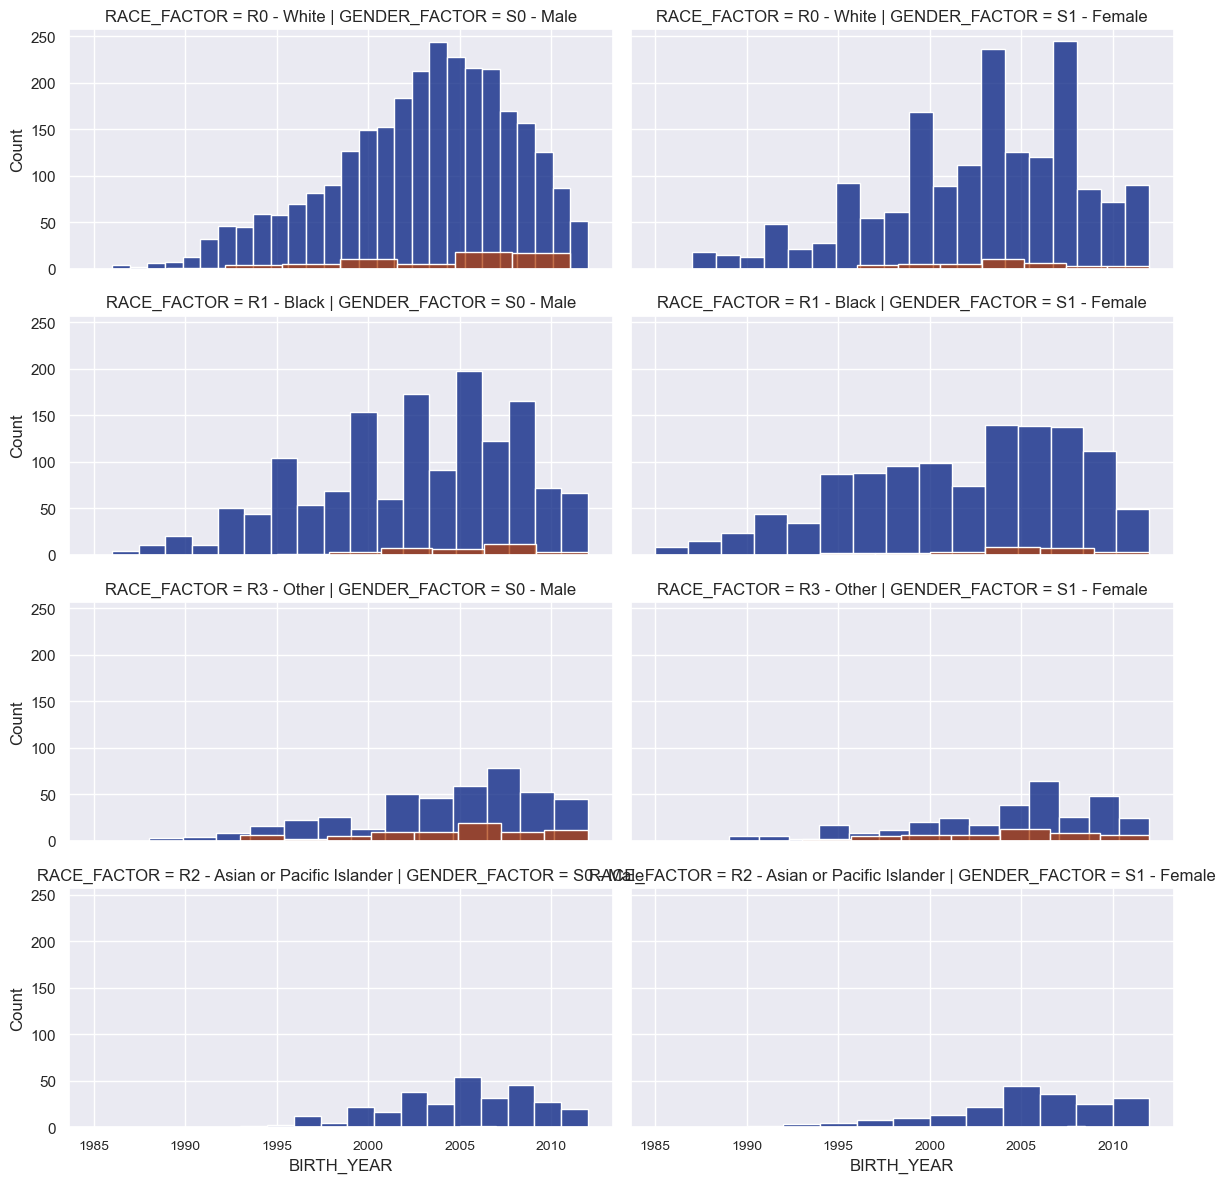

In [1243]:
g= sns.FacetGrid(data=peanut_df_clean,col='GENDER_FACTOR',row='RACE_FACTOR',height=3, aspect=2,
                 hue='ETHNICITY_FACTOR',
                 hue_order=['E0 - Non-Hispanic', 'E1 - Hispanic'], 
                 palette='dark', despine=False)
g.map(sns.histplot,'BIRTH_YEAR')


In [1259]:
#find allergy_age description  
allergy_age_stat=allergy_df_clean.describe()[['BIRTH_YEAR','AGE_START_YEARS','AGE_END_YEARS']]
allergy_age_stat


,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS
count,332801.000000,332801.000000,332801.000000
mean,2001.253329,3.946501,10.343202
std,6.601794,4.646885,5.622022
min,1983.000000,0.002738,1.007529
25%,1996.000000,0.021903,5.295003
50%,2002.000000,1.776865,10.201232
75%,2007.000000,7.214237,15.622177
max,2012.000000,17.984942,18.997947


In [1245]:
test_duration=allergy_df_clean['AGE_END_YEARS']-allergy_df_clean['AGE_START_YEARS']
start_age_missing=len(allergy_df_clean[allergy_df_clean['AGE_START_YEARS'].isna()==True])
end_age_missing=len(allergy_df_clean[allergy_df_clean['AGE_END_YEARS'].isna()==True])

test_duration_df=test_duration.describe().to_frame()
test_duration_df.columns=['Test Duration Summary']
print(f' Start AGE Missing :  {start_age_missing}\n',   
      f'End AGE Missing :  {end_age_missing}\n')

    

test_duration_df

 Start AGE Missing :  0
 End AGE Missing :  0



,Test Duration Summary
count,332801.000000
mean,6.396701
std,3.391412
min,1.002053
25%,3.430527
50%,6.157426
75%,9.215606
max,12.982888


In [1460]:
#create a function to get each allergen dataframs
def get_allergen_df(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df_clean[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR','AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    
    #add SENSITIVITY columns
    allergen_df_clean['SENSITIVITY_START_TAG']=''
    allergen_df_clean['SENSITIVITY_END_TAG']=''
    
    #fill out the start SENSITIVITY colums based on SENSITIVITY ranges
    allergen_df_clean['SENSITIVITY_START_TAG'][allergen_df_clean[allergen_start_column] <= 0.35 ]='Very Low'
    allergen_df_clean['SENSITIVITY_START_TAG'][ (0.35 < allergen_df_clean[allergen_start_column]) & 
                                               (allergen_df_clean[allergen_start_column]<= 0.7) ]='Low'
    allergen_df_clean['SENSITIVITY_START_TAG'][ (0.7 < allergen_df_clean[allergen_start_column]) & 
                                               (allergen_df_clean[allergen_start_column] <= 3.5) ]='Moderate'
    allergen_df_clean['SENSITIVITY_START_TAG'][ (3.5 < allergen_df_clean[allergen_start_column]) &
                                               (allergen_df_clean[allergen_start_column] <= 17.5) ]='High'
    allergen_df_clean['SENSITIVITY_START_TAG'][ allergen_df_clean[allergen_start_column] > 17.5 ]='Very High'
    
    
     #fill out the end SENSITIVITY colums based on SENSITIVITY ranges
    allergen_df_clean['SENSITIVITY_END_TAG'][allergen_df_clean[allergen_end_column] <= 0.35 ]='Very Low'
    allergen_df_clean['SENSITIVITY_END_TAG'][ (0.35 < allergen_df_clean[allergen_end_column]) &
                                             (allergen_df_clean.dropna()[allergen_end_column] <= 0.7) ]='Low'
    allergen_df_clean['SENSITIVITY_END_TAG'][ (0.7 < allergen_df_clean[allergen_end_column]) &
                                             (allergen_df_clean.dropna()[allergen_end_column] <= 3.5) ]='Moderate'
    allergen_df_clean['SENSITIVITY_END_TAG'][ (3.5 < allergen_df_clean[allergen_end_column]) &
                                             ( allergen_df_clean[allergen_end_column] <= 17.5) ]='High'
    allergen_df_clean['SENSITIVITY_END_TAG'][ allergen_df_clean[allergen_end_column] > 17.5 ]='Very High'
    
    
    return allergen_df_clean


In [1485]:
#Creat the peanut dataframe
peanut_df_clean=get_allergen_df('peanut')
peanut_df_clean.head()


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,PEANUT_ALG_START,PEANUT_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,9,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.019165,6.726899,1.221081,1.221081,Moderate,Moderate
1,66,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,0.008214,6.792608,2.521561,NaN,Moderate,
2,88,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.147844,5.681040,2.313484,2.313484,Moderate,Moderate
3,163,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.019165,6.885695,1.733060,NaN,Moderate,
4,164,2006,S0 - Male,R1 - Black,E0 - Non-Hispanic,0.013689,6.872005,5.587953,NaN,High,


In [1462]:
soy_df_clean=get_allergen_df('soy')
soy_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SOY_ALG_START,SOY_ALG_END,SENSITIVITY_START_TAG,SENSITIVITY_END_TAG
0,59,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,0.002738,5.875428,4.358658,NaN,High,
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.421629,5.133470,0.544832,0.544832,Low,Low
2,111,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.145106,6.781656,0.106776,0.106776,Very Low,Very Low
3,161,2006,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,0.013689,6.611910,6.428474,NaN,High,
4,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,0.334018,0.334018,Very Low,Very Low


In [1447]:
#plot the SENSITIVITY for each allergen (at start of the test and the end of the test)
def plot_sensitivity(allergen,color='blue'):
    allergen_df=get_allergen_df(allergen)
   
    #for start SENSITIVITY
    x_value=allergen_df['SENSITIVITY_START_TAG'].value_counts().index
    height=allergen_df['SENSITIVITY_START_TAG'].value_counts()

    edgecolor=['black']
    fontdict = {
            'size': 10,
            }
    plt.figure(figsize=(9, 5)) 
    
    plt.subplot(1,2,1)
    plt.bar( x=x_value,height=height,edgecolor=edgecolor,color=color)
    plt.xticks(rotation=90)
    plt.title(allergen.upper()+' (Start)')
    plt.ylabel('Number of cases')
    plt.xlabel('SENSITIVITY levels')
    plt.rc('xtick', labelsize=10) 
   # plt.savefig(f'output_data/{allergen}sensitivity_start.png')
    plt.tight_layout()
    
    
    #for end SENSITIVITY
    x_value=allergen_df['SENSITIVITY_END_TAG'].value_counts().drop('').index
  
    height=allergen_df['SENSITIVITY_END_TAG'].value_counts().drop('')

    edgecolor=['black']
    fontdict = {
            'size': 10,
            }
    
    plt.subplot(1,2,2)
    plt.bar( x=x_value,height=height,edgecolor=edgecolor,color=color)
    plt.xticks(rotation=90)
    plt.title(allergen.upper()+'(End)')
    plt.ylabel('Number of cases')
    plt.xlabel('SENSITIVITY levels')
    plt.rc('xtick', labelsize=10) 
    plt.tight_layout()
    plt.savefig(f'output_data/{allergen}sensitivity.png')



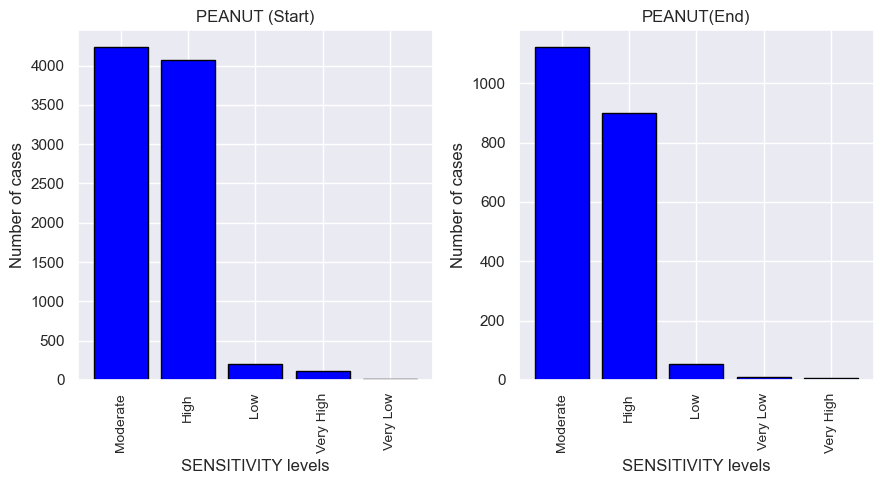

In [1448]:
plot_sensitivity('peanut')

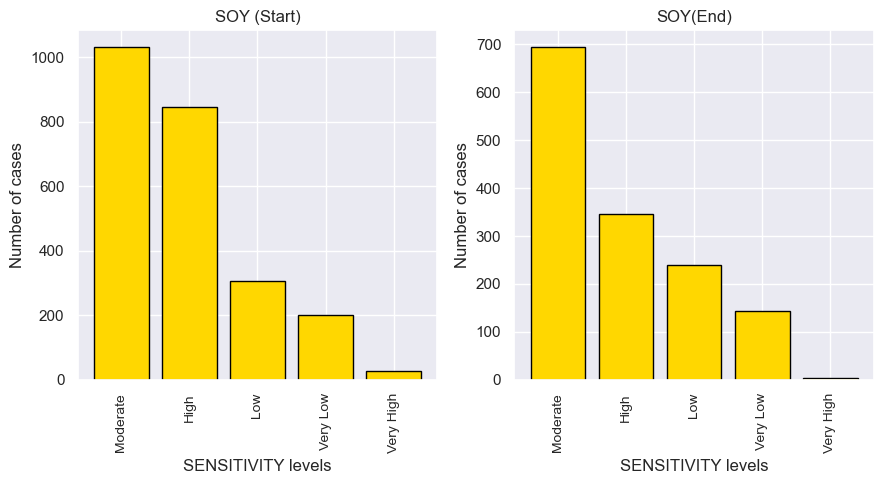

In [1449]:
plot_sensitivity('soy','gold')

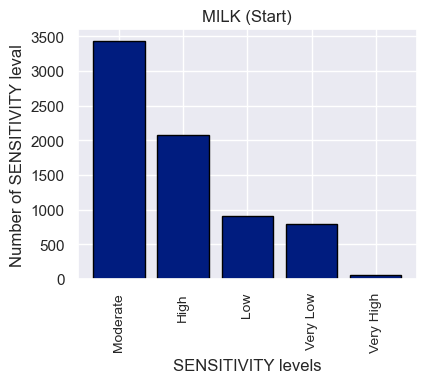

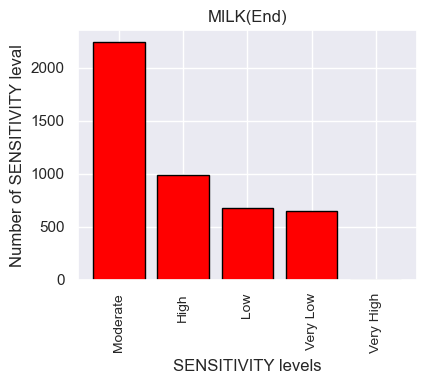

In [1430]:
plot_sensitivity('milk')

SyntaxError: invalid syntax (910898847.py, line 1)

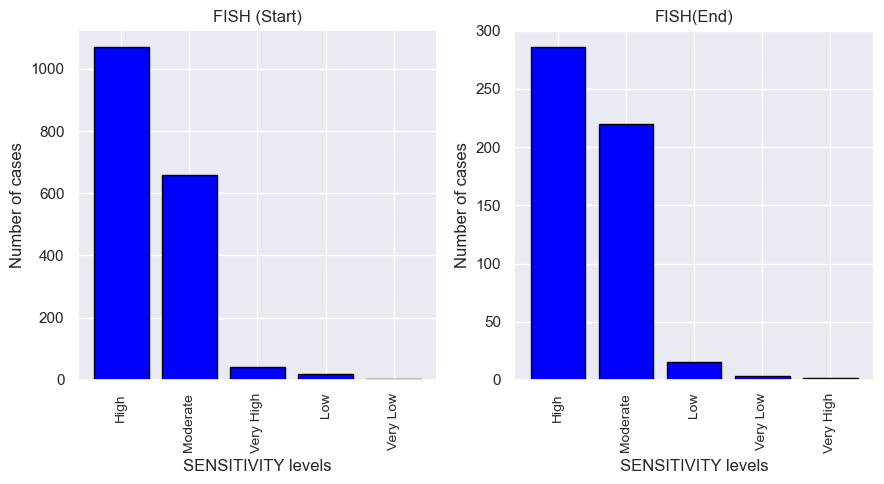

In [1464]:
plot_sensitivity('fish')

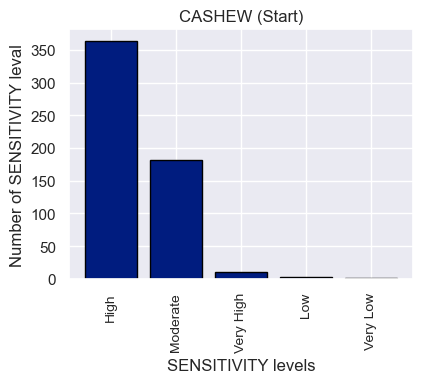

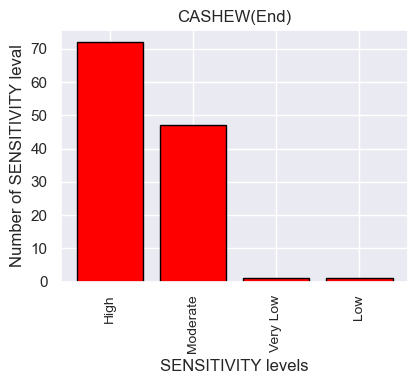

In [1431]:
plot_sensitivity('cashew')

In [1463]:
df=(soy_df_clean['SENSITIVITY_START_TAG'].value_counts()/len(soy_df_clean)*100).map("{:,.2f}%".format).to_frame()
df

,SENSITIVITY_START_TAG
Moderate,42.76%
High,35.01%
Low,12.73%
Very Low,8.38%
Very High,1.12%


In [1200]:
#Creat the soy dataframe
soy_df_clean=get_allergen_df('soy')
soy_df_clean.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,AGE_START_YEARS,AGE_END_YEARS,SOY_ALG_START,SOY_ALG_END
0,59,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,0.002738,5.875428,4.358658,NaN
1,71,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.421629,5.133470,0.544832,0.544832
2,111,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.145106,6.781656,0.106776,0.106776
3,161,2006,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,0.013689,6.611910,6.428474,NaN
4,198,2006,S0 - Male,R0 - White,E0 - Non-Hispanic,0.016427,6.855578,0.334018,0.334018


In [1246]:
#create year_summary just for the peanut and soy 
soy_year_summary=soy_df_clean.describe()['BIRTH_YEAR'].to_frame().reset_index()
soy_year_summary.columns=['','Soy Year Summary']

peanut_year_summary=peanut_df_clean.describe()['BIRTH_YEAR'].to_frame().reset_index()
peanut_year_summary.columns=['','Peanut Year Summary']


pd.merge(peanut_year_summary,soy_year_summary,on='')

,,Peanut Year Summary,Soy Year Summary
0,count,8639.000000,2411.000000
1,mean,2003.035421,2004.404397
2,std,5.422475,5.258493
3,min,1985.000000,1985.000000
4,25%,2000.000000,2002.000000
5,50%,2004.000000,2005.000000
6,75%,2007.000000,2008.000000
7,max,2012.000000,2012.000000


Text(0, 0.5, 'Allergy Response (Ku/l)')

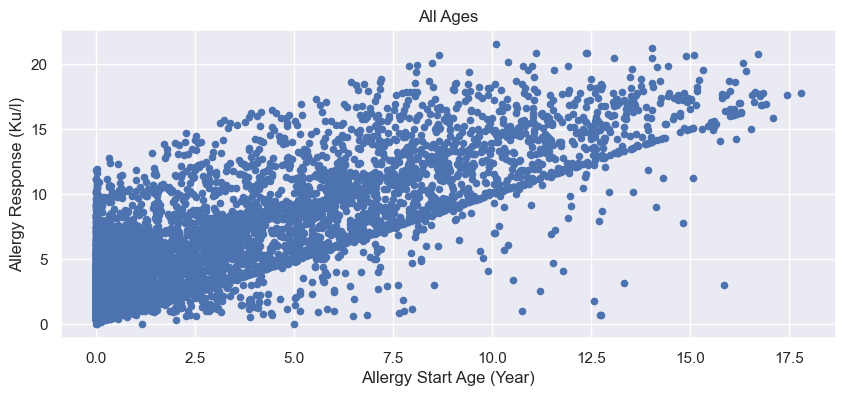

In [779]:
peanut_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="PEANUT_ALG_START", grid=True,figsize=(10,4))
plt.title('All Ages')
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')

In [1273]:
soy_df_clean['SOY_ALG_START'].min()

0.027378508

Text(0, 0.5, 'Allergy Response (Ku/l)')

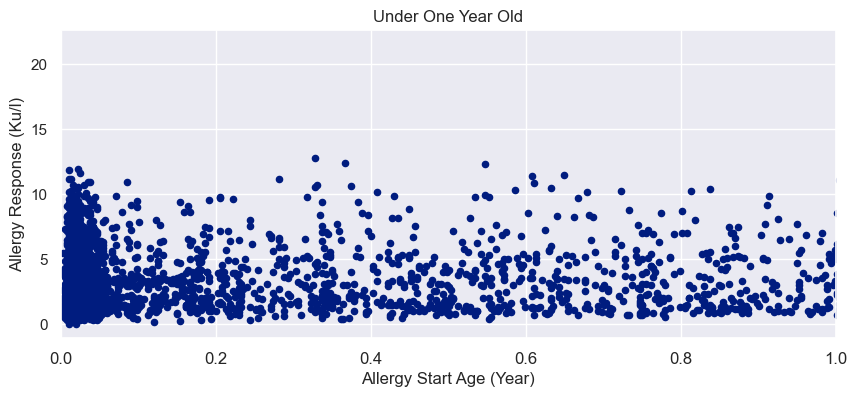

In [1073]:
peanut_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="PEANUT_ALG_START", grid=True,figsize=(10,4))
plt.xlim(0,1)
plt.title('Under One Year Old')
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')


Text(0, 0.5, 'Allergy Response (Ku/l)')

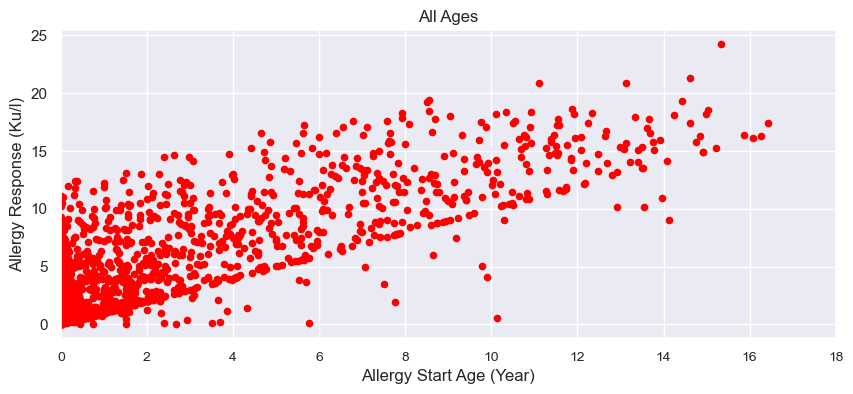

In [1151]:
soy_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SOY_ALG_START", grid=True,figsize=(10,4),color='red')
plt.title('All Ages')
plt.xlim(0,18)
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')

Text(0, 0.5, 'Allergy Response (Ku/l)')

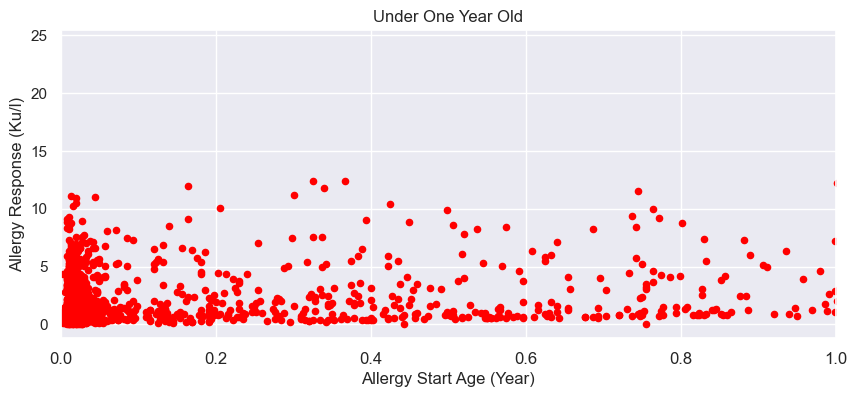

In [1075]:
soy_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="SOY_ALG_START", grid=True,figsize=(10,4),color='red')
plt.xlim(0,1)
plt.title('Under One Year Old')
plt.xlabel('Allergy Start Age (Year)')
plt.ylabel('Allergy Response (Ku/l)')

[Text(0.5, 1.0, 'First Response vs Last Response for Peanut')]

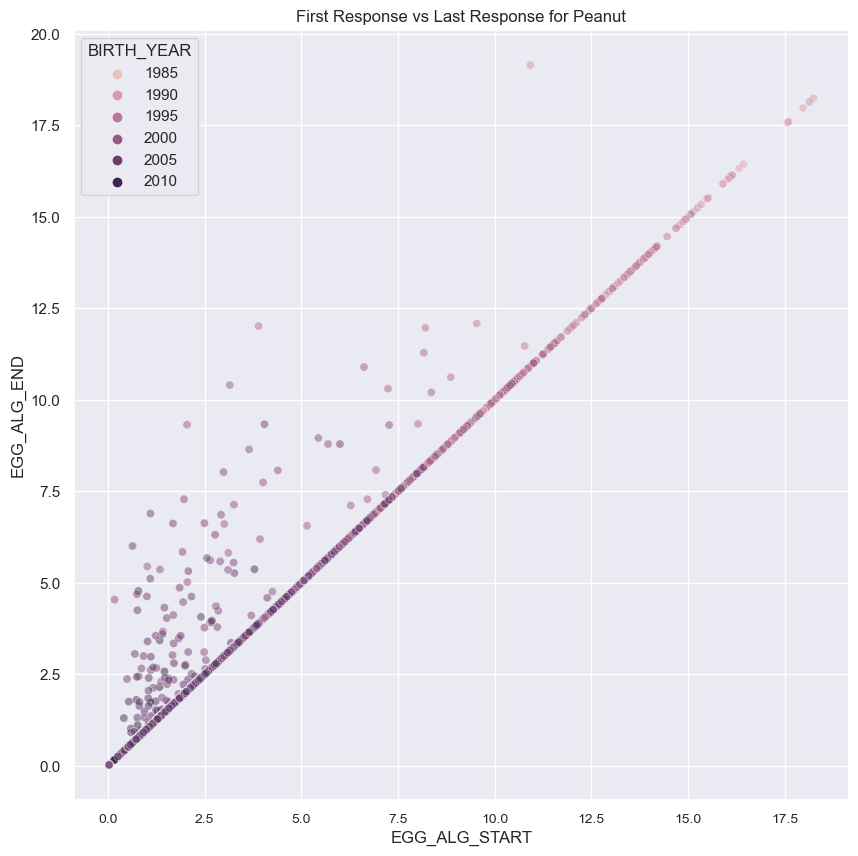

In [1247]:
sns_plot= sns.scatterplot(data=allergy_df_clean,x='EGG_ALG_START',y='EGG_ALG_END',
            hue='BIRTH_YEAR',alpha=0.5)
sns_plot.set(title='First Response vs Last Response for Peanut')
#fig[0].axes.set(xlabel='common xlabel', ylabel='common ylabel')

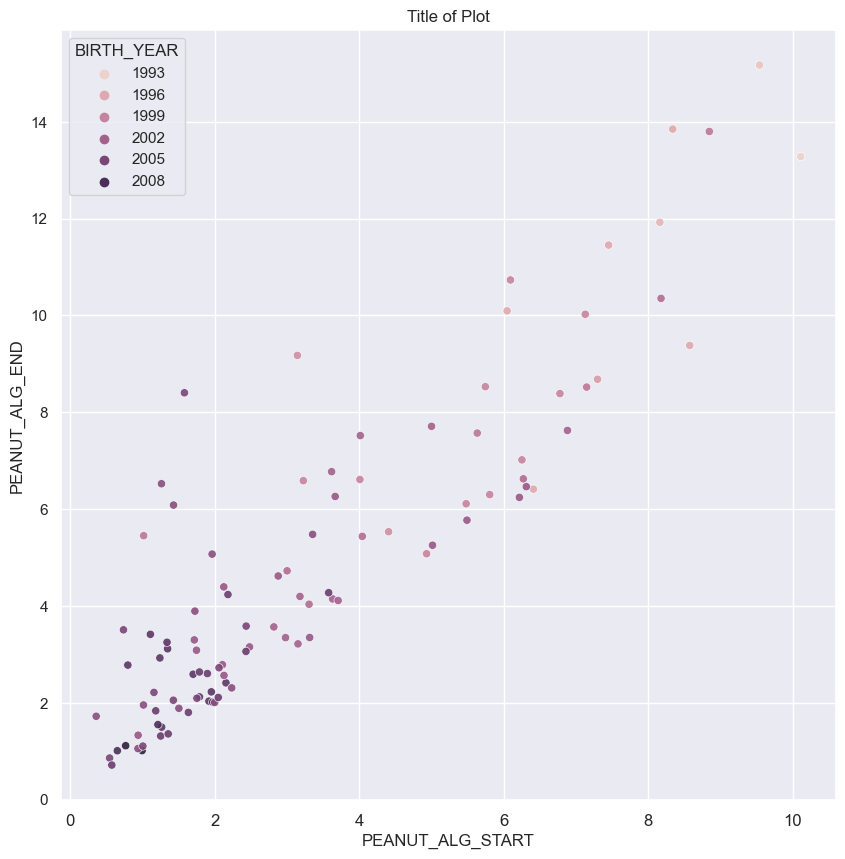

In [1082]:
df=peanut_df_clean[peanut_df_clean['PEANUT_ALG_START']<peanut_df_clean['PEANUT_ALG_END']]
fig = sns.scatterplot(data=df,x='PEANUT_ALG_START',y='PEANUT_ALG_END',
            hue='BIRTH_YEAR',alpha=0.9).set(title='Title of Plot')


In [1248]:
#Peanut Gender Summary
total_females=peanut_df_clean[peanut_df_clean['GENDER_FACTOR']=='S1 - Female'].count()['SUBJECT_ID']
female_percentage=round(total_females/total_rows*100,2)
black_females=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (peanut_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100
white_females=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R0 - White')& 
                (peanut_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100



total_males=peanut_df_clean[peanut_df_clean['GENDER_FACTOR']=='S0 - Male'].count()['SUBJECT_ID']
male_percentage=round(total_males/total_rows*100,2)
black_males=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (peanut_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100
white_males=peanut_df_clean[(peanut_df_clean['RACE_FACTOR']=='R0 - White')& 
                (peanut_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100




total_females=len(peanut_df_clean[peanut_df_clean['GENDER_FACTOR']=='S1 - Female'])
total_females
print('----   Peanut Gender Summary  ----')
print (f'Total number of females : {total_females}')
print (f'Percentage of females : {female_percentage}%')
print(f'Percentage of White Females: {round(white_females,2)}%')
print(f'Percentage of Black Females: {round(black_females,2)}%')

print('-----------------------')
print (f'Total number of males : {total_males}')
print (f'Percentage of males : {male_percentage}%')
print(f'Percentage of White Males: {round(white_males,2)}%')
print(f'Percentage of Black Males: {round(black_males,2)}%')


----   Peanut Gender Summary  ----
Total number of females : 3454
Percentage of females : 1.04%
Percentage of White Females: 50.03%
Percentage of Black Females: 33.82%
-----------------------
Total number of males : 5185
Percentage of males : 1.56%
Percentage of White Males: 55.72%
Percentage of Black Males: 28.91%


In [1249]:
#Soy Gender Summary
total_females=soy_df_clean[soy_df_clean['GENDER_FACTOR']=='S1 - Female'].count()['SUBJECT_ID']
female_percentage=round(total_females/total_rows*100,2)
black_females=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (soy_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100
white_females=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R0 - White')& 
                (soy_df_clean['GENDER_FACTOR']=='S1 - Female')].count()['SUBJECT_ID']/total_females*100



total_males=soy_df_clean[soy_df_clean['GENDER_FACTOR']=='S0 - Male'].count()['SUBJECT_ID']
male_percentage=round(total_males/total_rows*100,2)
black_males=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R1 - Black')& 
                (soy_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100
white_males=soy_df_clean[(soy_df_clean['RACE_FACTOR']=='R0 - White')& 
                (soy_df_clean['GENDER_FACTOR']=='S0 - Male')].count()['SUBJECT_ID']/total_males*100




total_females=len(soy_df_clean[soy_df_clean['GENDER_FACTOR']=='S1 - Female'])
total_females
print('----   Soy Gender Summary  ----')
print (f'Total number of females : {total_females}')
print (f'Percentage of females : {female_percentage}%')
print(f'Percentage of White Females: {round(white_females,2)}%')
print(f'Percentage of Black Females: {round(black_females,2)}%')

print('-----------------------')
print (f'Total number of males : {total_males}')
print (f'Percentage of males : {male_percentage}%')
print(f'Percentage of White Males: {round(white_males,2)}%')
print(f'Percentage of Black Males: {round(black_males,2)}%')


----   Soy Gender Summary  ----
Total number of females : 923
Percentage of females : 0.28%
Percentage of White Females: 61.43%
Percentage of Black Females: 22.64%
-----------------------
Total number of males : 1488
Percentage of males : 0.45%
Percentage of White Males: 60.08%
Percentage of Black Males: 23.99%


In [1414]:
allergen1=[]
allergen2=[]
corr_list=[]
year_list=[]

allergen_list=allergy_df_clean.columns[9:-9]
years=allergy_df_clean['BIRTH_YEAR'].unique()

allergen_list=[x for x in allergen_list if 'ALG_START' in x]
    
for z in years :
    allergy_year_df=allergy_df_clean[allergy_df_clean['BIRTH_YEAR']==z]
    for x in allergen_list:
        for y in allergen_list[allergen_list.index(x)+1:]:
                correlation = sts.pearsonr(allergy_year_df[x].fillna(0),
                                           allergy_year_df[y].fillna(0))

                if (correlation[0] > 0.5):
                    allergen1.append(x)
                    allergen2.append(y)
                    corr_list.append(round(correlation[0],2))
                    year_list.append(z)
                    
allergen_corr_df=pd.DataFrame(data={'Allergen_1':[allergen_name[:-10] for allergen_name in allergen1], 
                              'Allergen2':[allergen_name[:-10] for allergen_name in allergen2],
                               'r_value':corr_list, },
                              index=year_list)
print('\n----------------------------------------------------')
print('---- The Most Correlated Allergen in Each Year -----')
print('----------------------------------------------------')
allergen_corr_df.index.names=['Year']
allergen_corr_df


----------------------------------------------------
---- The Most Correlated Allergen in Each Year -----
----------------------------------------------------


,Allergen_1,Allergen2,r_value
Year,,,
1994,ALMOND,HAZELNUT,0.51
1994,BRAZIL,HAZELNUT,0.62
1999,WALNUT,PECAN,0.58
1990,WALNUT,PECAN,0.58
1990,ALMOND,HAZELNUT,0.69
1996,PISTACH,HAZELNUT,0.53
1991,WALNUT,ALMOND,0.55
1991,WALNUT,HAZELNUT,0.64
1991,ALMOND,HAZELNUT,0.59


In [1477]:
count_list=[]
mean_list=[]
max_list=[]
min_list=[]
allergen_stats=allergy_df_clean.describe()

for x in allergen_list:
    count=allergen_stats.loc['count',x]
    count_list.append(count)
    mean=round(allergen_stats.loc['mean',x],2)
    mean_list.append(mean)
    max_num = round(allergen_stats.loc['max',x],2)
    max_list.append(max_num)
    min_num = round(allergen_stats.loc['min',x],2)
    min_list.append(min_num)

allergy_response_df=pd.DataFrame(data={'Count':count_list,
                                       'Mean':mean_list,
                                       'Max':max_list,
                                       'Min':min_list},
                                 index=[allergen_name[:-10] for allergen_name in allergen_list])

print('\n----------------------------------')
print('---- Allergy Response Summary -----')
print('----------------------------------')
allergy_response_df.index.names=['Allergen']
allergy_response_df.sort_values(by=['Count','Mean'],ascending=False,inplace=True)
allergy_response_df


----------------------------------
---- Allergy Response Summary -----
----------------------------------


,Count,Mean,Max,Min
Allergen,,,,
PEANUT,8640.0,5.03,21.52,0.00
MILK,7255.0,3.31,25.43,0.00
EGG,6044.0,3.30,22.16,0.02
SHELLFISH,5240.0,8.73,24.30,0.09
SOY,2411.0,3.97,24.22,0.03
FISH,1793.0,6.64,22.50,0.08
WHEAT,1144.0,4.55,22.84,0.16
SESAME,765.0,6.13,22.72,0.49
WALNUT,704.0,7.60,20.05,0.34


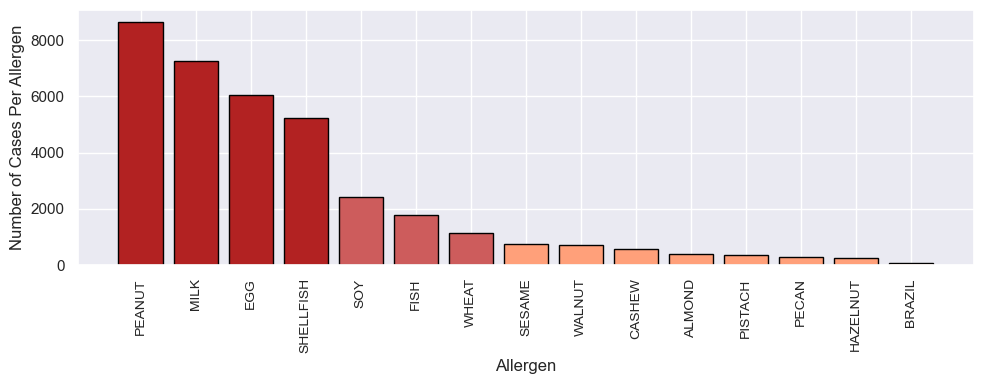

In [1416]:
colors=[]
percentage_25=allergy_response_df.describe().loc['25%','Count']
percentage_50=allergy_response_df.describe().loc['50%','Count']
percentage_75=allergy_response_df.describe().loc['75%','Count']

for value in allergy_response_df['Count']:
    if value> percentage_75:
        colors.append('firebrick')
    elif value > percentage_50:
        colors.append('indianred')
    else:
        colors.append('lightsalmon')
edgecolor=['black']
fontdict = {
        'size': 10,
        }
plt.figure(figsize=(10,4))
plt.bar( x=allergy_response_df.index,height=allergy_response_df['Count'],color=colors,edgecolor=edgecolor)
plt.xticks(rotation=90)
plt.ylabel('Number of Cases Per Allergen')
plt.xlabel('Allergen')
plt.rc('xtick', labelsize=10) 
plt.tight_layout()
plt.savefig('output_data/allergenDist.png')
